# **Dataset Reading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
from sklearn.decomposition import PCA
from sklearn.metrics import cohen_kappa_score

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Project HYPERSPECTRAL/Datasets/Salinas_Complete.csv')
data.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band166,band167,band168,band169,band170,band171,band172,band173,band174,band175,band176,band177,band178,band179,band180,band181,band182,band183,band184,band185,band186,band187,band188,band189,band190,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200,band201,band202,band203,band204,Label
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,1656,1670,1584,1643,1659,1619,1723,1785,1805,1822,1809,1790,1786,1770,1779,1737,1706,1709,1699,1663,1702,1682,1715,1682,1603,1615,1746,1784,1607,1757,...,424,429,437,409,391,378,364,354,329,340,344,337,321,310,291,284,272,254,240,250,216,220,192,162,173,149,134,129,138,104,96,109,93,54,79,54,36,11,17,0
1,379,400,600,1048,1352,1358,1322,1432,1633,1670,1649,1649,1597,1624,1630,1609,1699,1751,1772,1789,1778,1775,1752,1756,1774,1739,1698,1712,1684,1650,1703,1699,1690,1682,1605,1608,1744,1763,1586,1724,...,427,442,439,413,391,380,371,363,333,344,346,347,325,310,293,288,275,254,240,248,210,229,193,164,183,142,136,133,142,108,91,115,90,57,79,57,32,11,15,0
2,369,495,604,1005,1291,1356,1298,1382,1572,1591,1577,1558,1492,1511,1521,1508,1564,1608,1629,1638,1632,1631,1618,1599,1616,1584,1537,1557,1551,1495,1560,1554,1551,1533,1438,1431,1554,1561,1391,1515,...,386,398,394,377,354,344,336,327,297,313,306,310,296,285,269,257,251,230,223,221,185,197,173,148,165,133,124,124,122,96,85,93,78,55,69,49,29,9,17,0
3,298,391,525,961,1264,1308,1243,1366,1529,1591,1564,1535,1482,1502,1502,1471,1546,1624,1627,1629,1614,1606,1599,1582,1599,1559,1529,1533,1519,1479,1529,1528,1535,1534,1470,1433,1567,1568,1385,1520,...,393,400,392,378,361,347,339,332,297,316,316,310,301,283,269,263,256,230,222,228,199,210,174,155,169,129,125,118,125,96,85,95,86,52,75,47,30,11,10,0
4,298,391,525,961,1264,1308,1243,1366,1529,1591,1564,1535,1482,1502,1502,1471,1546,1624,1627,1629,1614,1606,1599,1582,1599,1559,1529,1533,1519,1479,1529,1528,1535,1534,1470,1433,1567,1568,1385,1520,...,393,400,392,378,361,347,339,332,297,316,316,310,301,283,269,263,256,230,222,228,199,210,174,155,169,129,125,118,125,96,85,95,86,52,75,47,30,11,10,0


In [ ]:
list=data.loc[:,['Label']]
list1=list.values
target=data['Label']
target.head()
target=target.to_numpy()
print(target.shape)
print(target)

(111104,)
[0 0 0 ... 0 0 0]


In [ ]:
data=data.drop('Label',axis=1)
data.head()
data=data.to_numpy()

In [ ]:
std_data = MinMaxScaler().fit_transform(data)
std_data.shape
acc=np.zeros((15,20))

In [ ]:
print(acc)
print(acc.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(15, 20)


# **KNN Implemenation**

In [ ]:
start=time.time()
for hell in range(2,17):
  start1=time.time()
  model =PCA(n_components=hell)
  pca = model.fit_transform(std_data)
  X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
  print("For band =",hell)
  for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred),"for k=",i)
    #print(hell-2,i-1)
    acc[hell-2][i-1]=metrics.accuracy_score(y_test, y_pred)
  end=time.time()
  print("Time taken for band",hell," is =",end-start1,"sec")
  max=np.argmax(acc[hell-2])
  print("Max accuracy=",acc[hell-2][max])
end=time.time()
print("Total Time Taken =",end-start,"sec")


For band = 2
Time taken for band 2  is = 62.46331262588501 sec
Max accuracy= 0.788795597443843
For band = 3
Time taken for band 3  is = 59.64232110977173 sec
Max accuracy= 0.8350712972368303
For band = 4
Time taken for band 4  is = 63.198312520980835 sec
Max accuracy= 0.8649274169698996
For band = 5
Time taken for band 5  is = 69.08586764335632 sec
Max accuracy= 0.8616486441309966
For band = 6
Time taken for band 6  is = 73.49247360229492 sec
Max accuracy= 0.857225515281653
For band = 7
Time taken for band 7  is = 78.80460143089294 sec
Max accuracy= 0.8632044539878878
For band = 8
Time taken for band 8  is = 81.69296288490295 sec
Max accuracy= 0.8672289869234825
For band = 9
Time taken for band 9  is = 84.57971787452698 sec
Max accuracy= 0.8691833926941226
For band = 10
Time taken for band 10  is = 89.68550109863281 sec
Max accuracy= 0.8684762063955357
For band = 11
Time taken for band 11  is = 95.83201742172241 sec
Max accuracy= 0.8699162948581127
For band = 12
Time taken for band 12 

In [ ]:
print(acc.shape)
print(acc)

(15, 20)
[[0.75405346 0.73868823 0.76372263 0.76482841 0.77564193 0.77416327
  0.77992362 0.77951217 0.78270094 0.78218662 0.78538825 0.78471963
  0.78563255 0.78621115 0.7867769  0.78759981 0.78727836 0.78781839
  0.78821699 0.7887956 ]
 [0.81128412 0.79886336 0.82352487 0.82214907 0.83053245 0.83046816
  0.83388837 0.83373407 0.83473699 0.8350713  0.83459555 0.83494272
  0.8345827  0.8341841  0.83365692 0.8335412  0.83265401 0.83279544
  0.83253828 0.83301403]
 [0.84749206 0.83495558 0.85475679 0.85523254 0.86090288 0.86085145
  0.86280586 0.86335875 0.86353876 0.86492742 0.86335875 0.86397593
  0.86258727 0.86321731 0.8623044  0.8631916  0.86122433 0.86170008
  0.86009283 0.86060715]
 [0.84731205 0.8346727  0.85505252 0.8543582  0.85934707 0.86101861
  0.86086431 0.86164864 0.86007998 0.86081288 0.85964281 0.86016998
  0.85926993 0.85961709 0.85893562 0.85901277 0.858087   0.85848559
  0.85745696 0.85686549]
 [0.84589768 0.83315547 0.85230093 0.85181233 0.85520682 0.85527111
  0.856

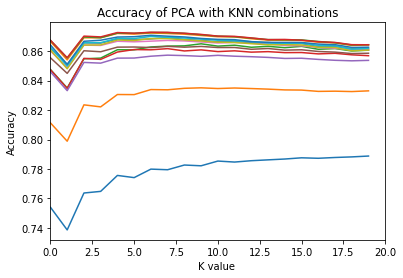

In [ ]:
for i in range(0,14):
  plt.plot(acc[i])
plt.xlim(0,20)
plt.title('Accuracy of PCA with KNN combinations')
plt.xlabel('K value ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
temp=band=k=0
for i in range(0,14):
  for j in range(0,20):
    if temp<acc[i][j]:
      temp=acc[i][j]
      band=i+2
      k=j+1
print("BAND = ",band,"K-Value=",k,"MAX ACCURACY=",acc[band-2][k-1])

BAND =  15 K-Value= 7 MAX ACCURACY= 0.8727707559178636


Accuracy: 0.8727707559178636
KAppa Coeefecient: 0.824590816794656
Average Time: 3.138770502060652


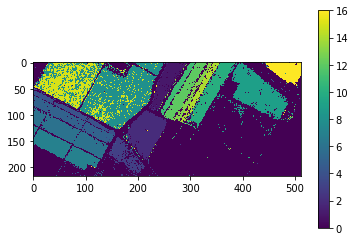

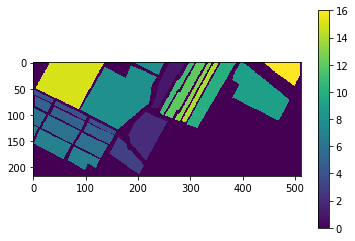

In [ ]:
model =PCA(n_components=band)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("KAppa Coeefecient:",metrics.cohen_kappa_score(y_test, y_pred))
print("Average Time:",(end-start)/320)

output=knn.predict(pca)
output=np.reshape(output,(217,512))
gt=np.reshape(target,(217,512))
from matplotlib.pyplot import imshow, show, colorbar
imshow(output)
colorbar()
show()
imshow(gt)
colorbar()
show()

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = k)
scores = cross_val_score(knn, pca, target, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.73422734 0.79668797 0.80064801 0.87543875 0.89657966 0.90747075
 0.89153915 0.90171017 0.88460846 0.83564356]
0.8524553825196218


# Report PCA KNN

In [ ]:
model =PCA(n_components=15)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.3, random_state = 100)
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
target_names =['Undefined','Brocoli_green_weeds_1','Brocoli_green_weeds_2','Fallow','Fallow_rough_plow',
                'Fallow_smooth','Stubble','Celery','Grapes_untrained','Soil_vinyard_develop',
                'Corn_senesced_green_weeds','Lettuce_romaine_4wk','Lettuce_romaine_5wk','Lettuce_romaine_6wk',
                'Lettuce_romaine_7wk','Vinyard_untrained','Vinyard_vertical_trellis']
from sklearn.metrics import classification_report, confusion_matrix
confusion=confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization


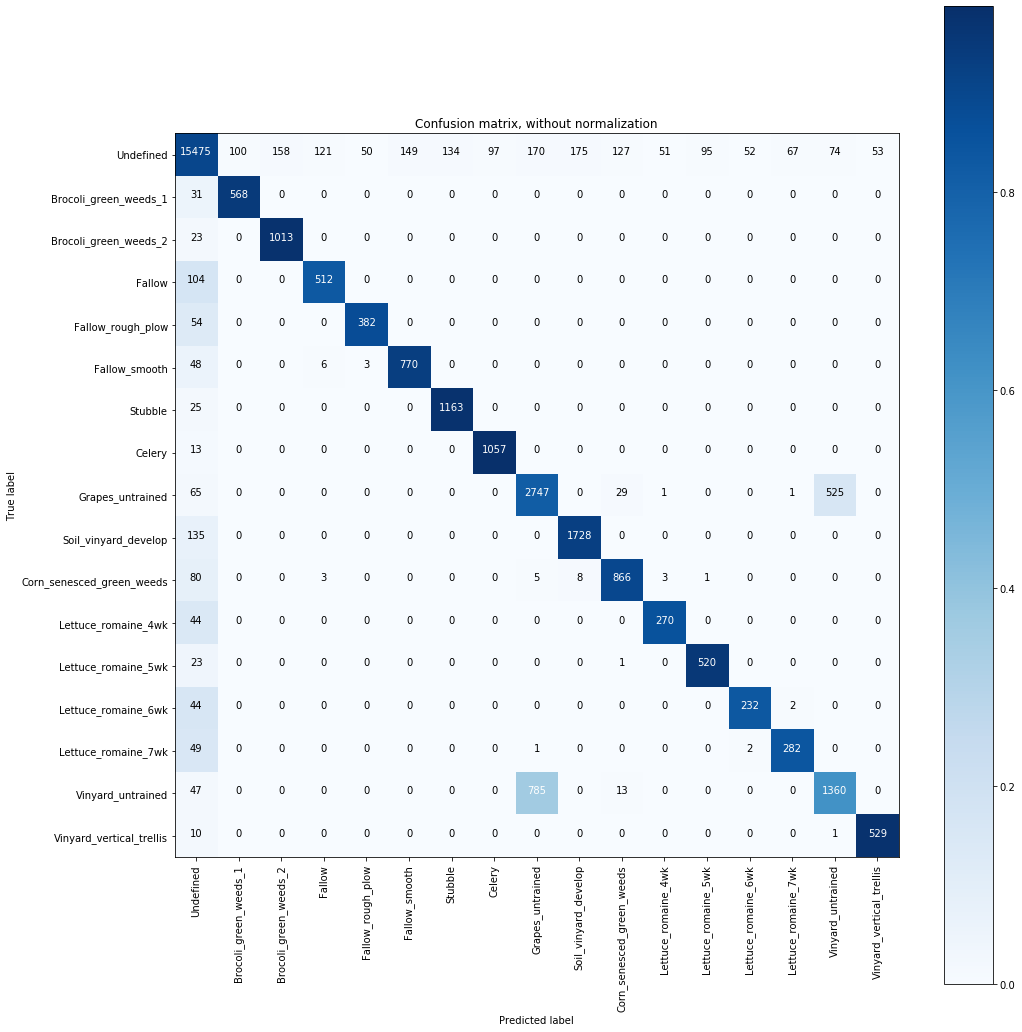

Normalized confusion matrix


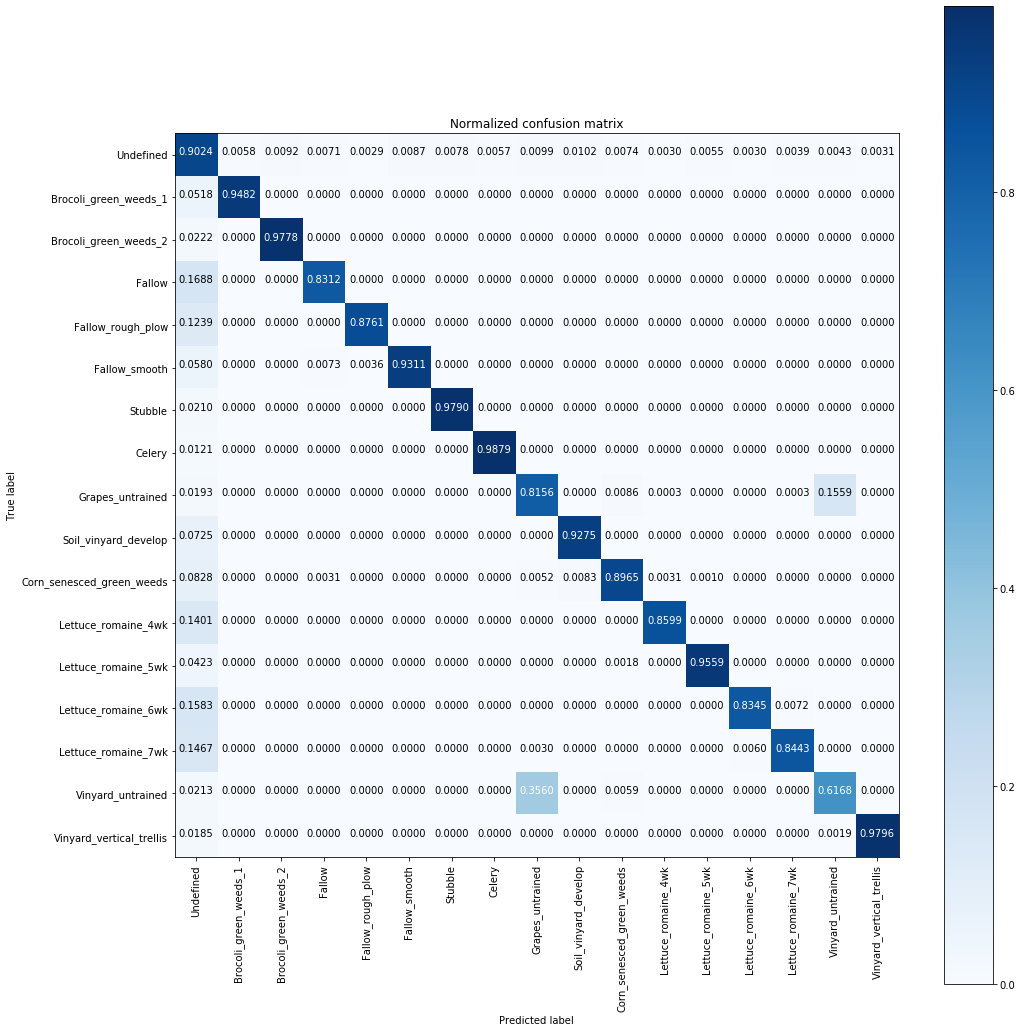

In [ ]:
import matplotlib.pyplot as plt
import itertools 
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.get_cmap("Blues")):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    Normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    if normalize:
        cm = Normalized
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(Normalized, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        thresh = cm[i].max() / 2.
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure(figsize=(15,15))
plot_confusion_matrix(confusion, classes=target_names, normalize=False, 
                      title='Confusion matrix, without normalization')
#plt.savefig("/content/drive/My Drive/Project HYPERSPECTRAL/Datasets/result/confusion_matrix_without_normalization.svg")
plt.show()
plt.figure(figsize=(15,15))
plot_confusion_matrix(confusion, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')
#plt.savefig("/content/drive/My Drive/Project HYPERSPECTRAL/Datasets/result/confusion_matrix_with_normalization.svg")
plt.show()

# **SVM Implementation**

In [ ]:
from sklearn import svm
acs=np.zeros(16)

In [ ]:
start=time.time()
for hell in range(2,17):
  start1=time.time()
  model =PCA(n_components=hell)
  pca = model.fit_transform(std_data)
  X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
  clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acs[hell]=metrics.accuracy_score(y_test, y_pred)
  end=time.time()
  print("Time taken for band",hell," is =",end-start1,"sec","Accuracy=",acs[hell])
end=time.time()
print("Total Time Taken =",end-start,"sec")

Time taken for band 2  is = 79.98073363304138 sec Accuracy= 0.7728131870957787
Time taken for band 3  is = 63.34955334663391 sec Accuracy= 0.8293366592519255
Time taken for band 4  is = 52.818318128585815 sec Accuracy= 0.8662389261054607
Time taken for band 5  is = 53.64497351646423 sec Accuracy= 0.8713692412533913
Time taken for band 6  is = 55.105162620544434 sec Accuracy= 0.8717806950998418
Time taken for band 7  is = 51.84696054458618 sec Accuracy= 0.8861430059275069
Time taken for band 8  is = 49.988988637924194 sec Accuracy= 0.8938191917503504
Time taken for band 9  is = 49.72531056404114 sec Accuracy= 0.8975222763684055
Time taken for band 10  is = 49.51409935951233 sec Accuracy= 0.9016496727656127
Time taken for band 11  is = 49.226709604263306 sec Accuracy= 0.9054170470471757
Time taken for band 12  is = 48.97287154197693 sec Accuracy= 0.9085415246936598
Time taken for band 13  is = 48.522974729537964 sec Accuracy= 0.9110488215704678
Time taken for band 14  is = 48.95067930221

IndexError: ignored

Text(0, 0.5, 'Accuracy')

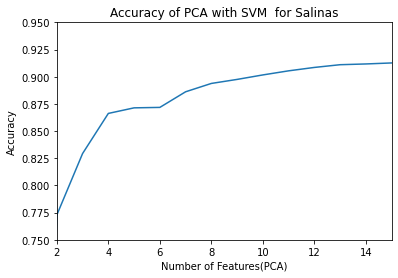

In [ ]:
plt.plot(acs)
plt.xlim(2,15)
plt.ylim(0.75,0.95)
plt.title('Accuracy of PCA with SVM  for Salinas')
plt.xlabel('Number of Features(PCA)')
plt.ylabel('Accuracy')

In [ ]:
max=np.argmax(acs)
print(max+2)
model =PCA(n_components=max+2)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy=",metrics.accuracy_score(y_test, y_pred))
print("Kappa Coeefeicient=",cohen_kappa_score(y_test, y_pred))
print("Average Time:",(end-start)/14)

16
Accuracy= 0.9145333213325961
Kappa Coeefeicient= 0.8817038992426519
Average Time: 57.68815149579729


0.9169786866359447


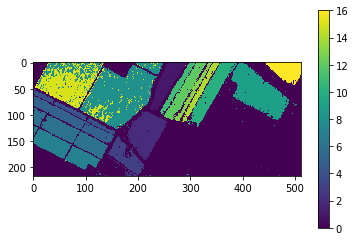

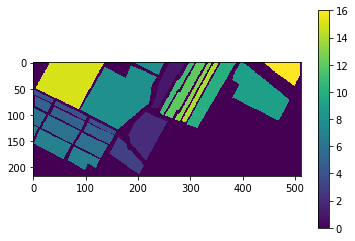

In [ ]:
model =PCA(n_components=max+2)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
clf.fit(X_train, y_train)
output = clf.predict(pca)
ans=metrics.accuracy_score(output,target)
print(ans)
output=np.reshape(output,(217,512))
gt=np.reshape(target,(217,512))
from matplotlib.pyplot import imshow, show, colorbar
imshow(output)
colorbar()
show()
imshow(gt)
colorbar()
show()

In [ ]:
from sklearn.model_selection import cross_val_score
svm = svm.SVC(C=175,kernel='rbf',gamma=0.75)
scores = cross_val_score(svm, pca, target, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.75510755 0.82710827 0.85734857 0.92079921 0.93690369 0.94761476
 0.94068407 0.93618362 0.92745275 0.84734473]
0.8896547221997873


# Report PCA SVM


In [ ]:
model =PCA(n_components=16)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
model = svm.SVC(C=175,kernel='rbf',gamma=0.75)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
target_names =['Undefined','Brocoli_green_weeds_1','Brocoli_green_weeds_2','Fallow','Fallow_rough_plow',
                'Fallow_smooth','Stubble','Celery','Grapes_untrained','Soil_vinyard_develop',
                'Corn_senesced_green_weeds','Lettuce_romaine_4wk','Lettuce_romaine_5wk','Lettuce_romaine_6wk',
                'Lettuce_romaine_7wk','Vinyard_untrained','Vinyard_vertical_trellis']
from sklearn.metrics import classification_report, confusion_matrix
confusion=confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization


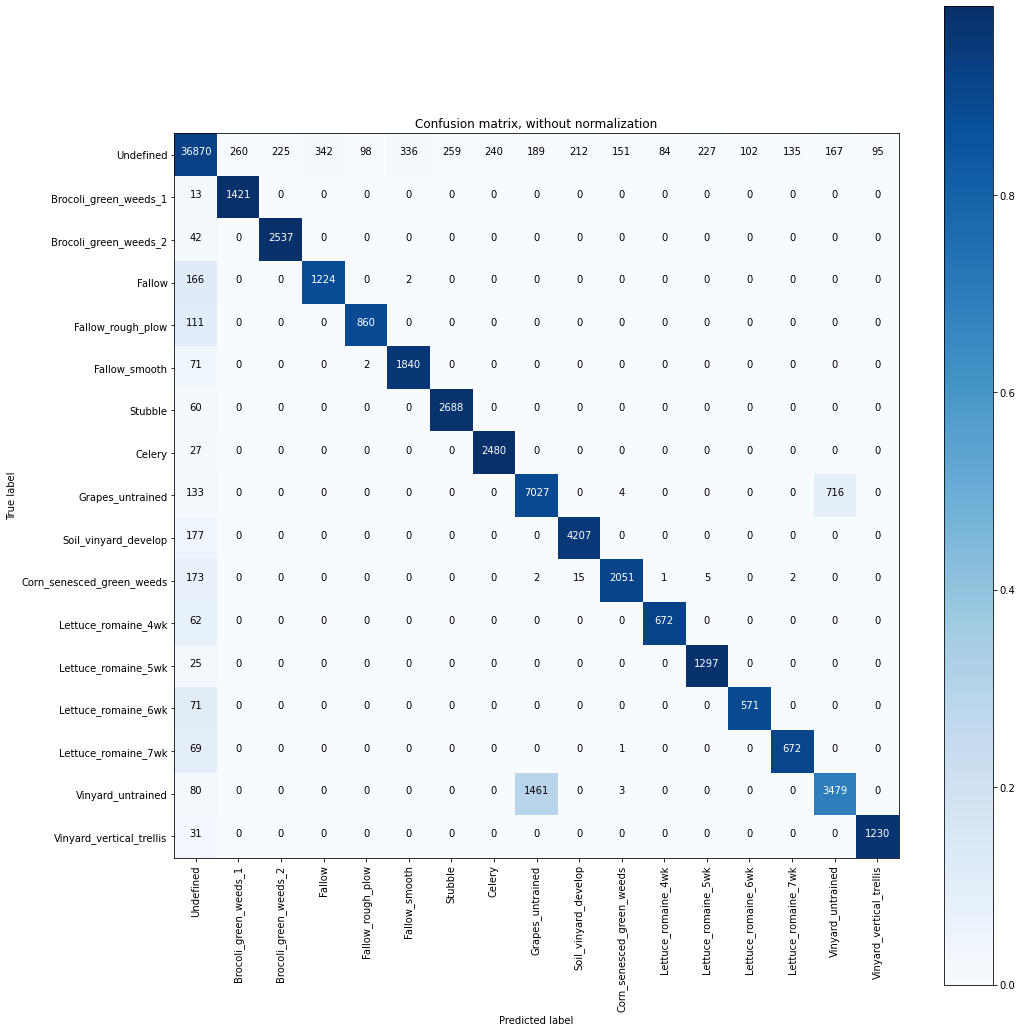

Normalized confusion matrix


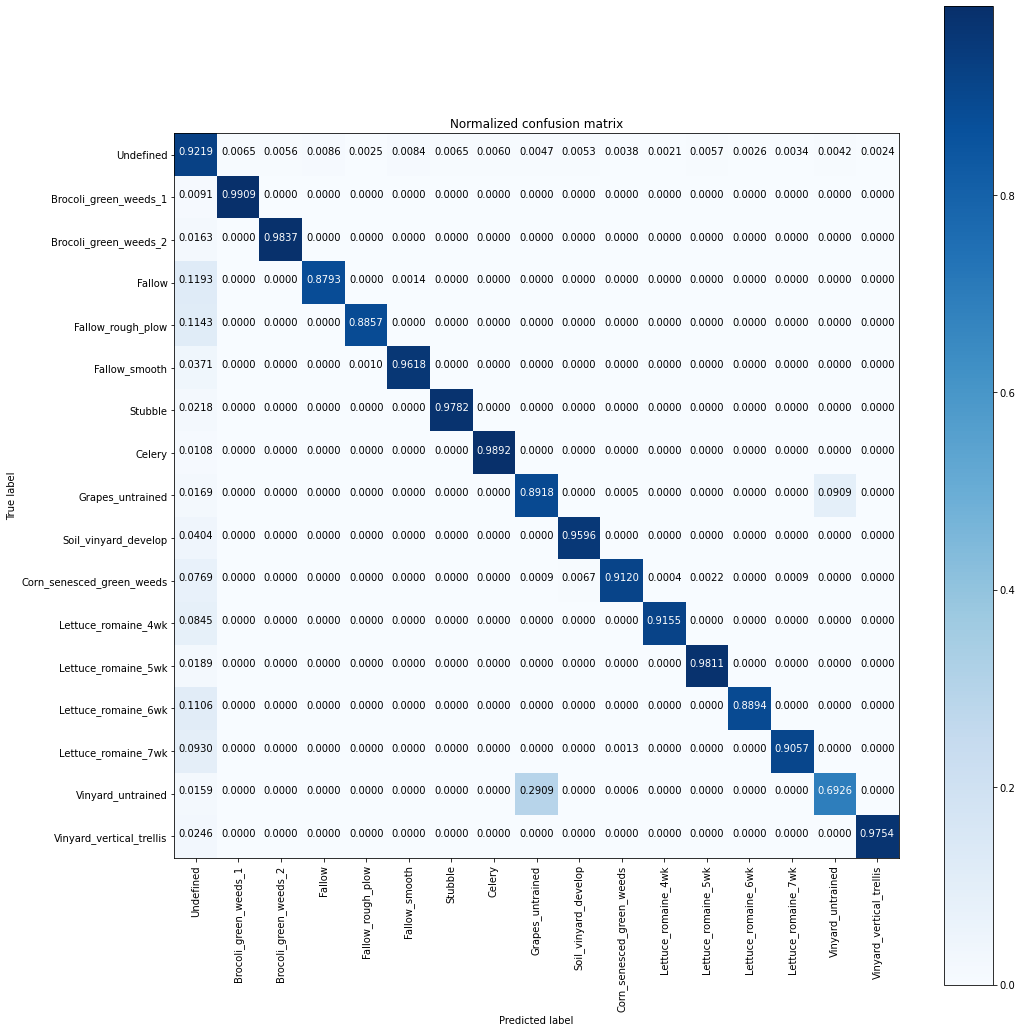

In [ ]:
import matplotlib.pyplot as plt
import itertools 
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.get_cmap("Blues")):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    Normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    if normalize:
        cm = Normalized
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(Normalized, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        thresh = cm[i].max() / 2.
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure(figsize=(15,15))
plot_confusion_matrix(confusion, classes=target_names, normalize=False, 
                      title='Confusion matrix, without normalization')
#plt.savefig("/content/drive/My Drive/Project HYPERSPECTRAL/Datasets/result/confusion_matrix_without_normalization.svg")
plt.show()
plt.figure(figsize=(15,15))
plot_confusion_matrix(confusion, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')
#plt.savefig("/content/drive/My Drive/Project HYPERSPECTRAL/Datasets/result/confusion_matrix_with_normalization.svg")
plt.show()